In [2]:
#data wrangling and datetime
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
tran = pd.read_excel("KPMG.xlsx", sheet_name="Transactions")
tran.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# in ra info bảng
print(tran.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
# describe default
tran.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [6]:
# describe các biến object
print(tran[['order_status','brand','product_line','product_class','product_size']].describe())

       order_status  brand product_line product_class product_size
count         20000  19803        19803         19803        19803
unique            2      6            4             3            3
top        Approved  Solex     Standard        medium       medium
freq          19821   4253        14176         13826        12990


In [7]:
# describe all
tran.describe(include='all')

C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\3985296171.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tran.describe(include='all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [8]:
# count số dòng bị null ở mỗi cột
print(tran.isna().sum())

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


# 1. Data Correction

## 1.1 Drop NA

In [9]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all= tran.dropna()
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [10]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order= tran.dropna(subset='online_order')
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [11]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = tran.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill= tran.fillna(method='ffill')
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [13]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill= tran.fillna(method='bfill')
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [14]:
# load sheet Demographic và hiển thị top head
demo = pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")
demo.DOB = pd.to_datetime(demo.DOB)
demo.head()

C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\857496518.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demo = pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [15]:
# in ra info bảng
print(demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [16]:
# describe các giá trị object
demo[['first_name','last_name','gender','job_title','job_industry_category', 'wealth_segment','deceased_indicator','default','owns_car']].describe()

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [17]:
# Remove all NA rows, then use output for the following steps
demo_dropna_all= demo.dropna()

In [18]:
# In ra các giá trị unique của cột gender
unique_gender = pd.unique(demo.gender)
print(unique_gender)

['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [19]:
# Quy chuẩn cột gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
demo_unique = demo.replace({'F':'Female', 'M':'Male', 'U':'Unisex', 'Femal':'Female'})
unique_gender_new = pd.unique(demo_unique.gender)
print(unique_gender_new)

['Female' 'Male' 'Unisex']


In [20]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
demo_dropna_all['age'] = 2017 - demo_dropna_all["DOB"].dt.year
print('Min_age: ' + str(demo_dropna_all.age.min()))
print('Max_age: ' + str(demo_dropna_all.age.max()))

Min_age: 15
Max_age: 86


C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\609864977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['age'] = 2017 - demo_dropna_all["DOB"].dt.year


In [21]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut
demo_dropna_all['age_group'] = pd.cut(x=demo_dropna_all['age'], bins=[0, 34, 55, 86]
       , labels=["Young", "Middle", "Older"])
demo_dropna_all.head(5)

C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\1905183120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_dropna_all['age_group'] = pd.cut(x=demo_dropna_all['age'], bins=[0, 34, 55, 86]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,64,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,37,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,63,Older
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,44,Middle
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,29,Young


# 2. Data Completeness

In [22]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
df = df_dropna_all.merge(demo_dropna_all, how = 'outer', on=['customer_id'] ,indicator=True).loc[lambda x : x['_merge']=='right_only']
df1 = pd.merge(demo_dropna_all, df, on="customer_id", how="inner")
df2 = df1[['customer_id','first_name_x']]
df2.head(5)

,customer_id,first_name_x
0,852,Andie
1,869,Addia
2,1373,Shaylynn
3,3229,Carrol
4,3464,Etheline


# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
df3 = df_dropna_all.groupby('order_status', as_index=False)['transaction_id'].nunique()
df3._get_value(0, 'transaction_id')

19273

In [24]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
df_dropna_all['year_month'] = df_dropna_all['transaction_date'].dt.strftime('%Y-%m')
df_dropna_all['2017_month'] = df_dropna_all['transaction_date'].dt.strftime('%m')

df4 = df_dropna_all.groupby('year_month', as_index=False)['customer_id'].nunique()
df4

C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\3479110066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna_all['year_month'] = df_dropna_all['transaction_date'].dt.strftime('%Y-%m')
C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\3479110066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna_all['2017_month'] = df_dropna_all['transaction_date'].dt.strftime('%m')


,year_month,customer_id
0,2017-01,1321
1,2017-02,1258
2,2017-03,1277
3,2017-04,1284
4,2017-05,1281
5,2017-06,1238
6,2017-07,1327
7,2017-08,1346
8,2017-09,1240
9,2017-10,1378


In [25]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
df_dropna_all['gross_margin'] = df_dropna_all.list_price - df_dropna_all.standard_cost
df5 = df_dropna_all.groupby(['year_month','2017_month'], as_index=False).gross_margin.agg("sum")
df5
# Tạo thêm cột 2017_month để phần 4 vẽ biểu đồ

C:\Users\Kien Le\AppData\Local\Temp\ipykernel_17144\4281391178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna_all['gross_margin'] = df_dropna_all.list_price - df_dropna_all.standard_cost


,year_month,2017_month,gross_margin
0,2017-01,01,915151.359988
1,2017-02,02,852514.230000
2,2017-03,03,865312.550000
3,2017-04,04,888856.890000
4,2017-05,05,904003.210000
5,2017-06,06,841815.260000
6,2017-07,07,919677.790000
7,2017-08,08,951376.270000
8,2017-09,09,843736.130000
9,2017-10,10,968986.414984


In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
df6 = df_dropna_all.groupby(["online_order", "order_status"]).agg({"transaction_id": "count", "list_price": "sum"})
df6

transaction_id   list_price
online_order order_status                             
0.0          Approved                9631  10666230.05
             Cancelled                 75     86837.88
1.0          Approved                9642  10670179.59
             Cancelled                 97    108924.20

# 4. Data Visualization

In [27]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...). 
# Với đầy đủ tên chart, tên các trục và chú thích.
import seaborn as sns
import matplotlib.pyplot as plt

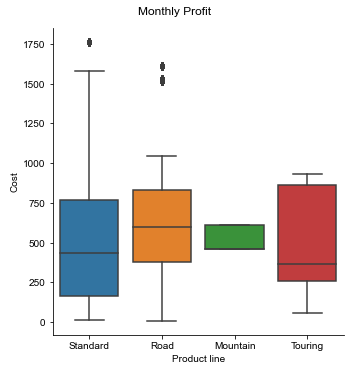

In [28]:
# Biểu đồ box
c1 = sns.catplot(x="product_line", y="standard_cost", data = df_dropna_all,kind="box")
c1.fig.suptitle('Monthly Profit', y=1.03)
c1.set(xlabel="Product line", ylabel="Cost")
sns.set_context("notebook")
sns.set_palette("RdBu")
sns.set_style("darkgrid")
plt.show()

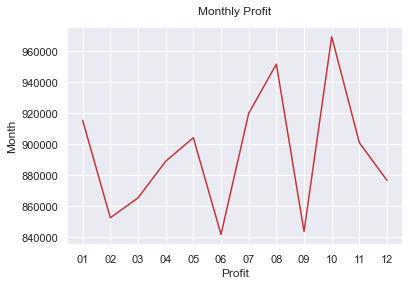

In [29]:
# Biểu đồ line
c2 = sns.lineplot(x="2017_month", y="gross_margin", data = df5, markers=True)
c2.set_title('Monthly Profit', y=1.03)
c2.set(xlabel="Profit", ylabel="Month")
sns.set_context("notebook")
sns.set_palette("PRGn")
sns.set_style("darkgrid")
plt.show()

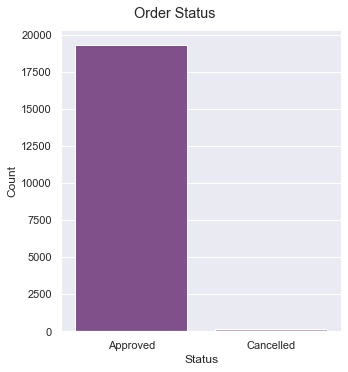

In [30]:
# Biểu đồ countplot
c3 = sns.catplot(x="order_status", data = df_dropna_all, kind="count")
c3.fig.suptitle('Order Status', y=1.03)
c3.set(xlabel="Status", ylabel="Count")
sns.set_context("notebook")
sns.set_palette("RdBu")
sns.set_style("whitegrid")
plt.show()

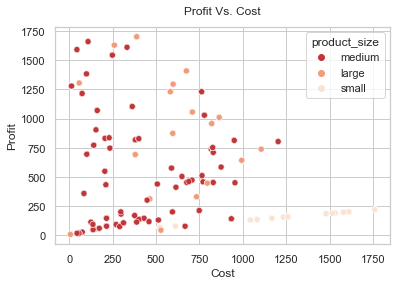

In [31]:
# Biểu đồ scatter
c4 = sns.scatterplot(x="standard_cost", y="gross_margin", data = df_dropna_all, hue="product_size")
c4.set_title('Profit Vs. Cost', y=1.03)
c4.set(xlabel="Cost", ylabel="Profit")
sns.set_context("notebook")
sns.set_palette("RdBu")
sns.set_style("ticks")
plt.show()

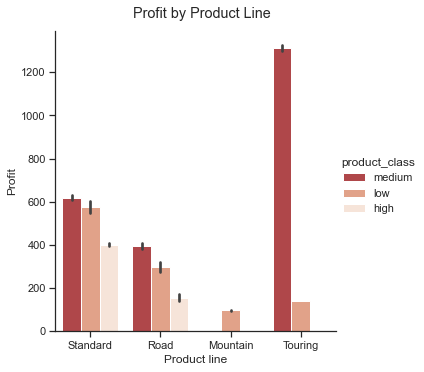

In [32]:
# Biểu đồ bar
c1 = sns.catplot(x="product_line", y="gross_margin", data = df_dropna_all,kind="bar", hue="product_class")
c1.fig.suptitle('Profit by Product Line', y=1.03)
c1.set(xlabel="Product line", ylabel="Profit")
sns.set_context("notebook")
sns.set_palette("RdBu")
sns.set_style("whitegrid")
plt.show()